In [11]:
# General for data analytic
import numpy as np
import pandas as pd
import glob

# vitualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Model
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier


# skip warning
from sklearn import preprocessing
import warnings
warnings.filterwarnings( action= 'ignore')

### Read file

In [3]:

files = glob.glob("/home/sw22389/assignment/EyeT/EyeT_group_dataset_II_image_name_grey_blue_participant_2_trial_*.csv")
dfs = []
for file in files:
    df_sample = pd.read_csv(file,low_memory=False)
    dfs.append(df_sample)
concatenated_df = pd.concat(dfs)
df_sample = concatenated_df


In [18]:
#file = "/home/sw22389/assignment/EyeT/EyeT_group_dataset_II_image_name_grey_blue_participant_2_trial_1.csv"
#df = pd.read_csv(file,low_memory=False)

In [4]:
df = df_sample.sort_values(by='Computer timestamp', ascending=True)
df

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
1,6104,48551458,515022635629,NaN,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,NaN,Saccade,133.0,241.0,NaN,NaN,NaN,NaN,NaN,NaN
0,6103,48551458,515022635629,NaN,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,NaN,Saccade,133.0,241.0,NaN,NaN,NaN,NaN,NaN,NaN
2,6105,48556071,515022640242,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,416.0,Fixation,92.0,148.0,1237.0,347.0,"0,6668","0,3217",NaN,NaN
3,6106,48564392,515022648563,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,416.0,Fixation,92.0,148.0,1237.0,347.0,"0,6668","0,3217",NaN,NaN
4,6107,48572740,515022656911,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,416.0,Fixation,92.0,148.0,1237.0,347.0,"0,6668","0,3217",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26766,46550,228252561,515730187545,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording5,30.09.2020,30.09.2020,...,NaN,Unclassified,42.0,1840.0,NaN,NaN,NaN,NaN,NaN,NaN
26767,46551,228260894,515730195878,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording5,30.09.2020,30.09.2020,...,NaN,Unclassified,42.0,1840.0,NaN,NaN,NaN,NaN,NaN,NaN
26768,46552,228269225,515730204209,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording5,30.09.2020,30.09.2020,...,NaN,Unclassified,42.0,1840.0,NaN,NaN,NaN,NaN,NaN,NaN
26769,46553,228277557,515730212541,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording5,30.09.2020,30.09.2020,...,NaN,Unclassified,42.0,1840.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35569 entries, 1 to 26770
Data columns (total 71 columns):
Unnamed: 0                             35569 non-null int64
Recording timestamp                    35569 non-null int64
Computer timestamp                     35569 non-null int64
Sensor                                 35456 non-null object
Project name                           35569 non-null object
Export date                            35569 non-null object
Participant name                       35569 non-null object
Recording name                         35569 non-null object
Recording date                         35569 non-null object
Recording date UTC                     35569 non-null object
Recording start time                   35569 non-null object
Recording start time UTC               35569 non-null object
Recording duration                     35569 non-null int64
Timeline name                          35569 non-null object
Recording Fixation filter name         35

In [6]:
for i in df.columns:
    print("{} = {}".format(i,len(df[i].unique().tolist())))

Unnamed: 0 = 35569
Recording timestamp = 35543
Computer timestamp = 35543
Sensor = 3
Project name = 1
Export date = 1
Participant name = 1
Recording name = 4
Recording date = 1
Recording date UTC = 1
Recording start time = 4
Recording start time UTC = 4
Recording duration = 4
Timeline name = 1
Recording Fixation filter name = 1
Recording software version = 1
Recording resolution height = 1
Recording resolution width = 1
Recording monitor latency = 1
Eyetracker timestamp = 34869
Event = 6
Event value = 9
Gaze point X = 1773
Gaze point Y = 1229
Gaze point left X = 1767
Gaze point left Y = 1235
Gaze point right X = 1768
Gaze point right Y = 1212
Gaze direction left X = 21711
Gaze direction left Y = 20224
Gaze direction left Z = 5999
Gaze direction right X = 20648
Gaze direction right Y = 19060
Gaze direction right Z = 4958
Pupil diameter left = 189
Pupil diameter right = 222
Validity left = 3
Validity right = 3
Eye position left X (DACSmm) = 1376
Eye position left Y (DACSmm) = 775
Eye pos

In [7]:
import datetime
# Define a function to convert timestamps to dates
def convert_timestamp(timestamp_ms):
    timestamp_datetime = datetime.datetime.fromtimestamp(timestamp_ms / 1000)
    date_format = '%Y-%m-%d %H:%M:%S.%f' # specify your desired date format here
    formatted_date = timestamp_datetime.strftime(date_format)
    return formatted_date

# Apply the conversion function to the dataframe column
df['date'] = df['Computer timestamp'].apply(convert_timestamp)

# Print the resulting dataframe
df

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y,date
1,6104,48551458,515022635629,NaN,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,Saccade,133.0,241.0,NaN,NaN,NaN,NaN,NaN,NaN,1986-04-27 22:50:35.629000
0,6103,48551458,515022635629,NaN,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,Saccade,133.0,241.0,NaN,NaN,NaN,NaN,NaN,NaN,1986-04-27 22:50:35.629000
2,6105,48556071,515022640242,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,Fixation,92.0,148.0,1237.0,347.0,"0,6668","0,3217",NaN,NaN,1986-04-27 22:50:40.242000
3,6106,48564392,515022648563,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,Fixation,92.0,148.0,1237.0,347.0,"0,6668","0,3217",NaN,NaN,1986-04-27 22:50:48.563000
4,6107,48572740,515022656911,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording1,30.09.2020,30.09.2020,...,Fixation,92.0,148.0,1237.0,347.0,"0,6668","0,3217",NaN,NaN,1986-04-27 22:50:56.911000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26766,46550,228252561,515730187545,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording5,30.09.2020,30.09.2020,...,Unclassified,42.0,1840.0,NaN,NaN,NaN,NaN,NaN,NaN,1986-05-06 03:23:07.545000
26767,46551,228260894,515730195878,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording5,30.09.2020,30.09.2020,...,Unclassified,42.0,1840.0,NaN,NaN,NaN,NaN,NaN,NaN,1986-05-06 03:23:15.878000
26768,46552,228269225,515730204209,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording5,30.09.2020,30.09.2020,...,Unclassified,42.0,1840.0,NaN,NaN,NaN,NaN,NaN,NaN,1986-05-06 03:23:24.209000
26769,46553,228277557,515730212541,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording5,30.09.2020,30.09.2020,...,Unclassified,42.0,1840.0,NaN,NaN,NaN,NaN,NaN,NaN,1986-05-06 03:23:32.541000


In [15]:
df['Recording name'].unique()

array(['Recording1', 'Recording2', 'Recording3', 'Recording5'],
      dtype=object)

In [101]:
# Convert the string values to float values

df['Pupil diameter left'] = df['Pupil diameter left'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)
df['Pupil diameter right'] = df['Pupil diameter right'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)
df_left_drop_nan = df.dropna(subset=['Pupil diameter left'])
df_right_drop_nan = df.dropna(subset=['Pupil diameter right'])
df_gaze_x_drop_nan = df.dropna(subset=['Gaze point X'])
df_gaze_y_drop_nan = df.dropna(subset=['Gaze point Y'])


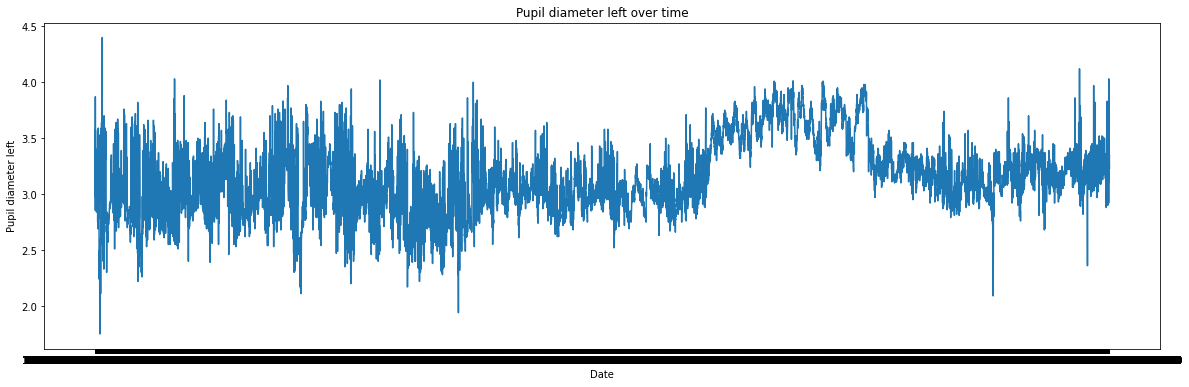

In [9]:
# Plot the data
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(df_left_drop_nan['date'], df_left_drop_nan['Pupil diameter left'])

# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Pupil diameter left')
plt.title('Pupil diameter left over time')

# Show the plot
plt.show()

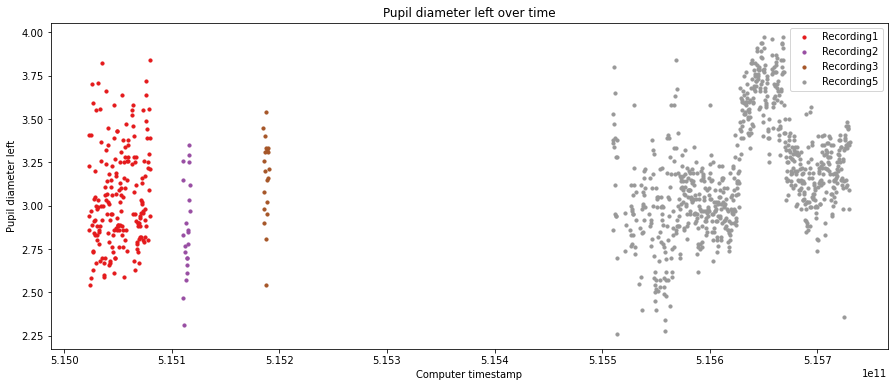

In [20]:
import matplotlib as mpl

# Use a simpler backend
mpl.use('agg')

# Subset the data to plot only a portion of it
df_subset = df_left_drop_nan.iloc[::10, :]

# Use a smaller figure size
fig, ax = plt.subplots(figsize=(15, 6))

# Get the unique recording names
recording_names = df_subset['Recording name'].unique()

# Define a colormap with a unique color for each recording name
cmap = mpl.cm.get_cmap('Set1', len(recording_names))
colors = {name: cmap(i) for i, name in enumerate(recording_names)}

# Plot each group separately with a different color
for name, group in df_subset.groupby('Recording name'):
    ax.scatter(group['Computer timestamp'], group['Pupil diameter left'], s=10, color=colors[name], label=name)

# Add a legend
ax.legend()

# Add axis labels and title
ax.set_xlabel('Computer timestamp')
ax.set_ylabel('Pupil diameter left')
ax.set_title('Pupil diameter left over time')

# Show the plot
plt.show()


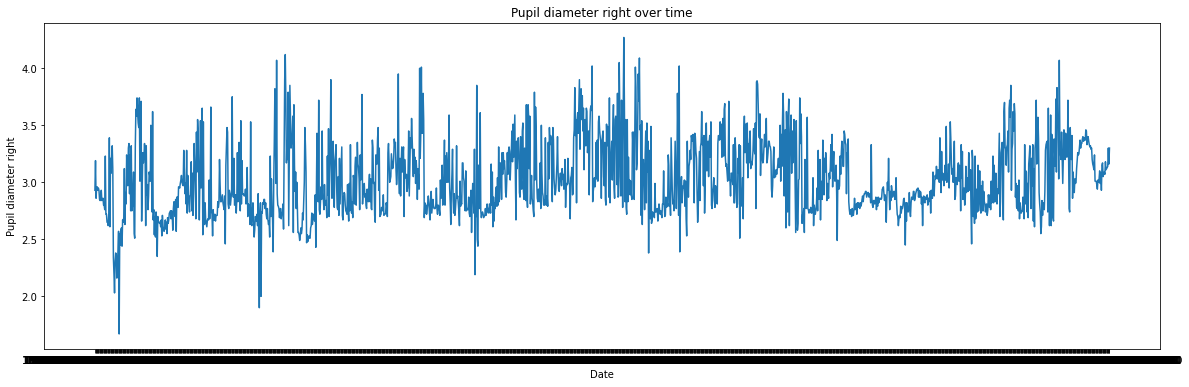

In [33]:
# Plot the data
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(df_right_drop_nan['date'], df_right_drop_nan['Pupil diameter right'])

# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Pupil diameter right')
plt.title('Pupil diameter right over time')

# Show the plot
plt.show()

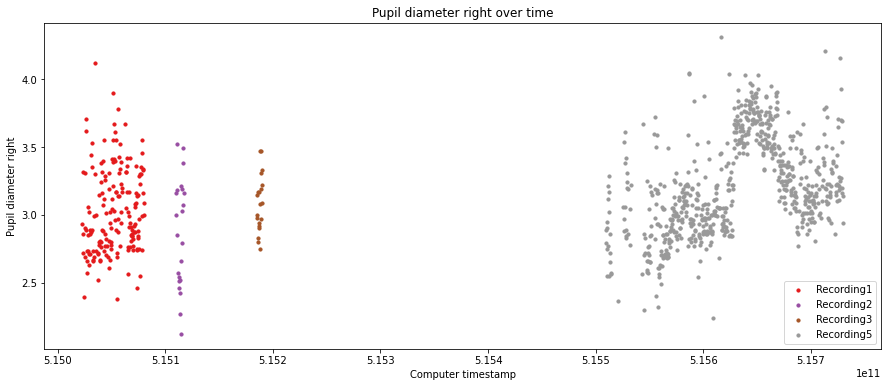

In [21]:
import matplotlib as mpl

# Use a simpler backend
mpl.use('agg')

# Subset the data to plot only a portion of it
df_subset = df_right_drop_nan.iloc[::10, :]

# Use a smaller figure size
fig, ax = plt.subplots(figsize=(15, 6))

# Get the unique recording names
recording_names = df_subset['Recording name'].unique()

# Define a colormap with a unique color for each recording name
cmap = mpl.cm.get_cmap('Set1', len(recording_names))
colors = {name: cmap(i) for i, name in enumerate(recording_names)}

# Plot each group separately with a different color
for name, group in df_subset.groupby('Recording name'):
    ax.scatter(group['Computer timestamp'], group['Pupil diameter right'], s=10, color=colors[name], label=name)

# Add a legend
ax.legend()

# Add axis labels and title
ax.set_xlabel('Computer timestamp')
ax.set_ylabel('Pupil diameter right')
ax.set_title('Pupil diameter right over time')

# Show the plot
plt.show()


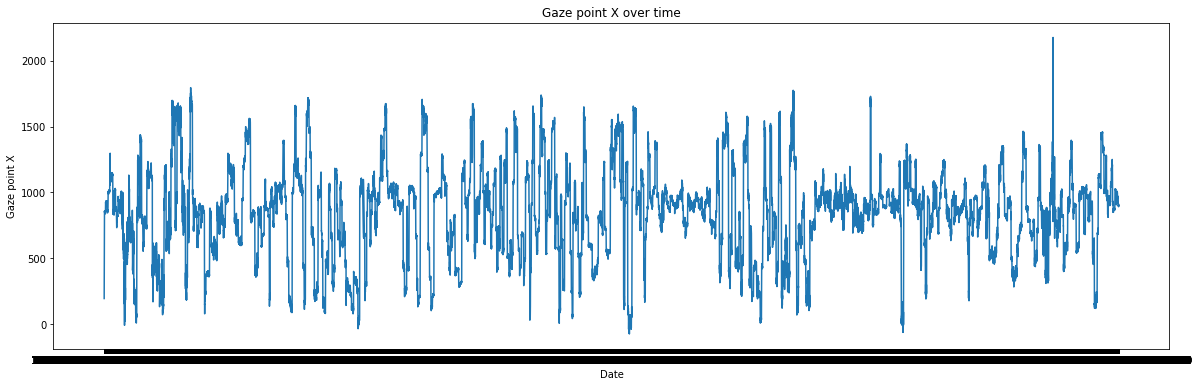

In [47]:
# Plot the data
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(df_gaze_x_drop_nan['date'], df_gaze_x_drop_nan['Gaze point X'])

# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Gaze point X')
plt.title('Gaze point X over time')

# Show the plot
plt.show()

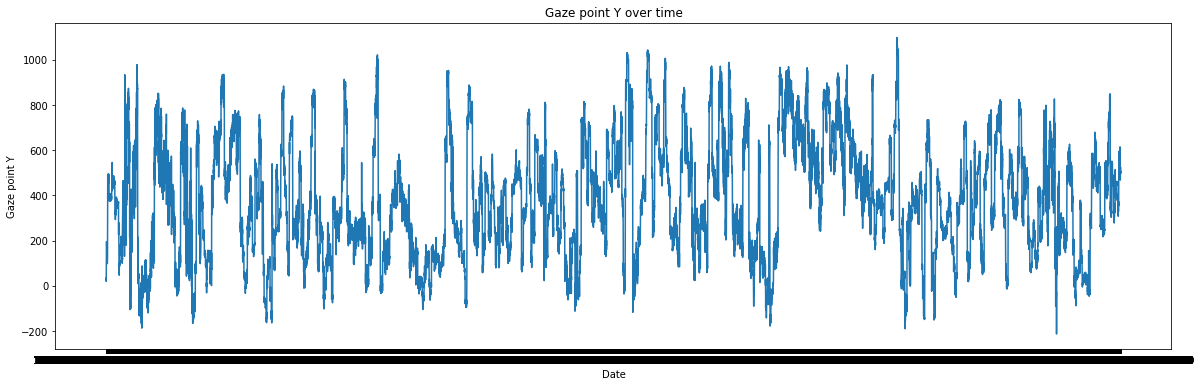

In [45]:
# Plot the data
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(df_gaze_y_drop_nan['date'], df_gaze_y_drop_nan['Gaze point Y'])

# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Gaze point Y')
plt.title('Gaze point Y over time')

# Show the plot
plt.show()

/usr/local/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/to

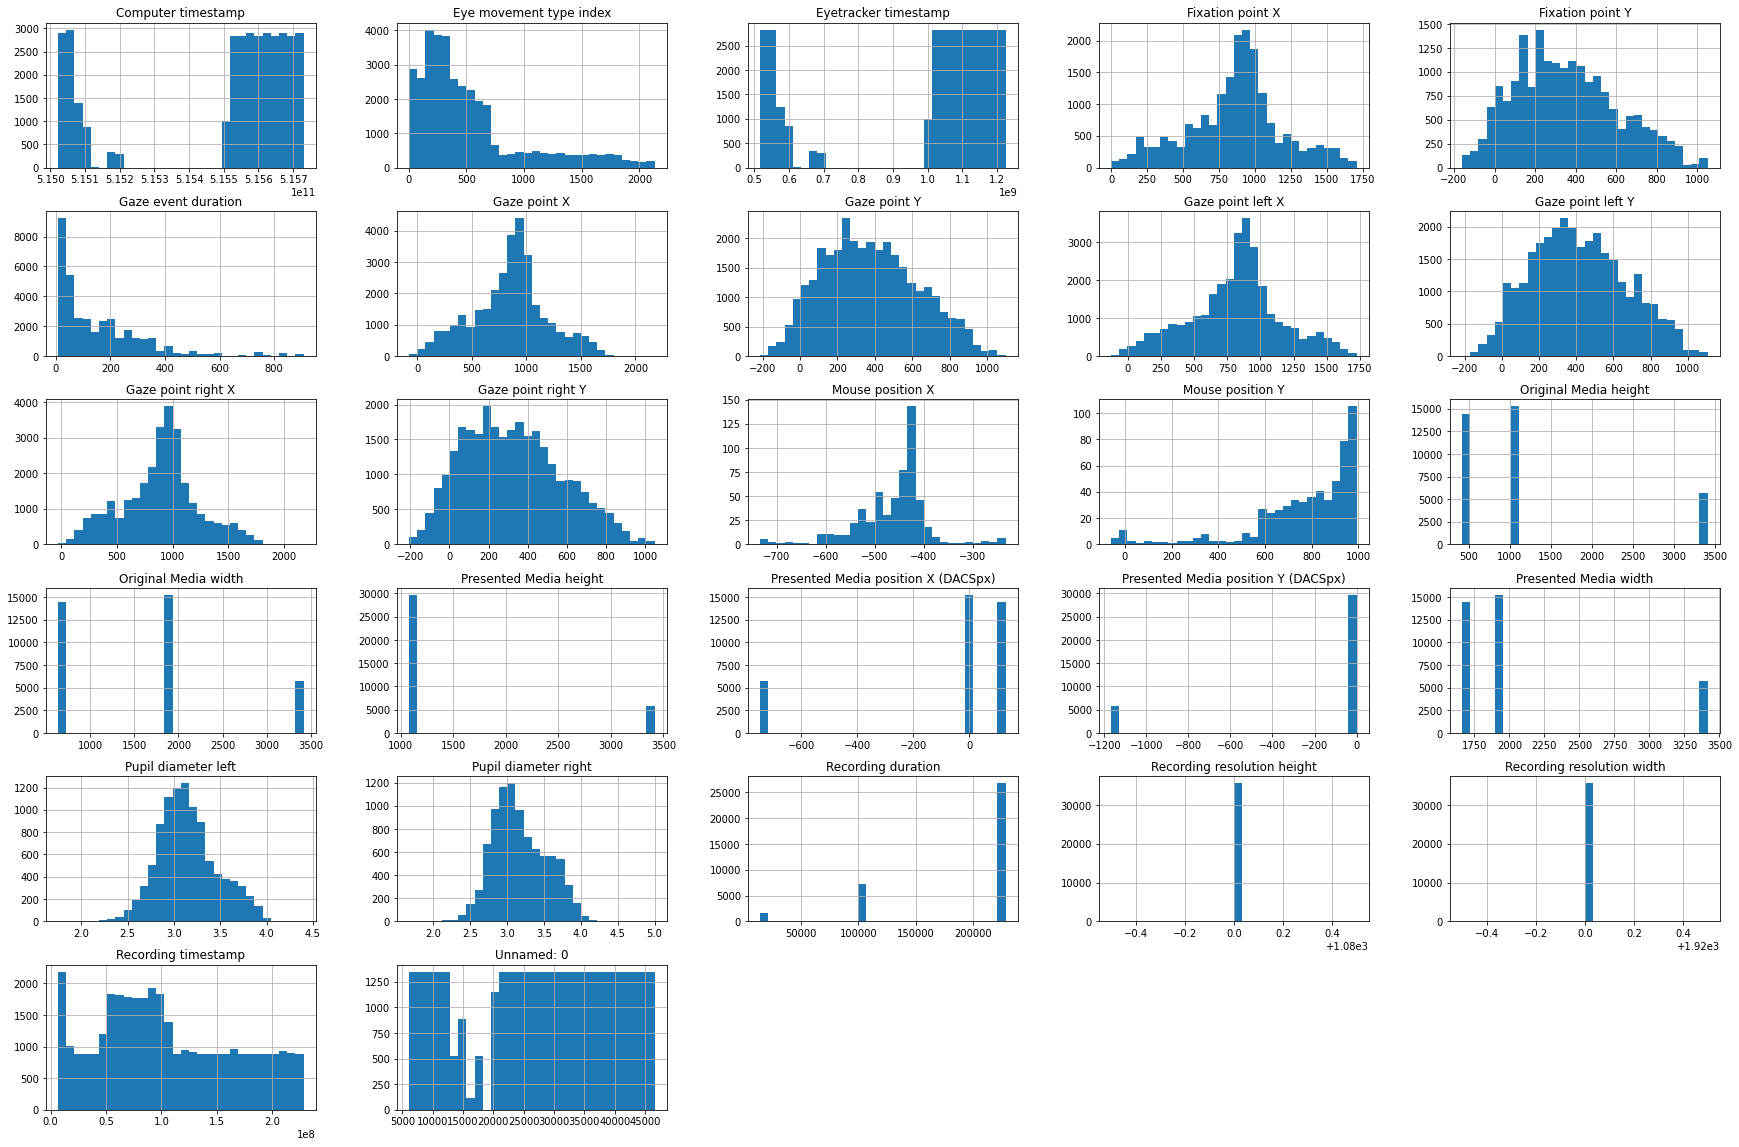

In [48]:
_ = df.hist(bins=30, figsize=(30,20))

<AxesSubplot:>

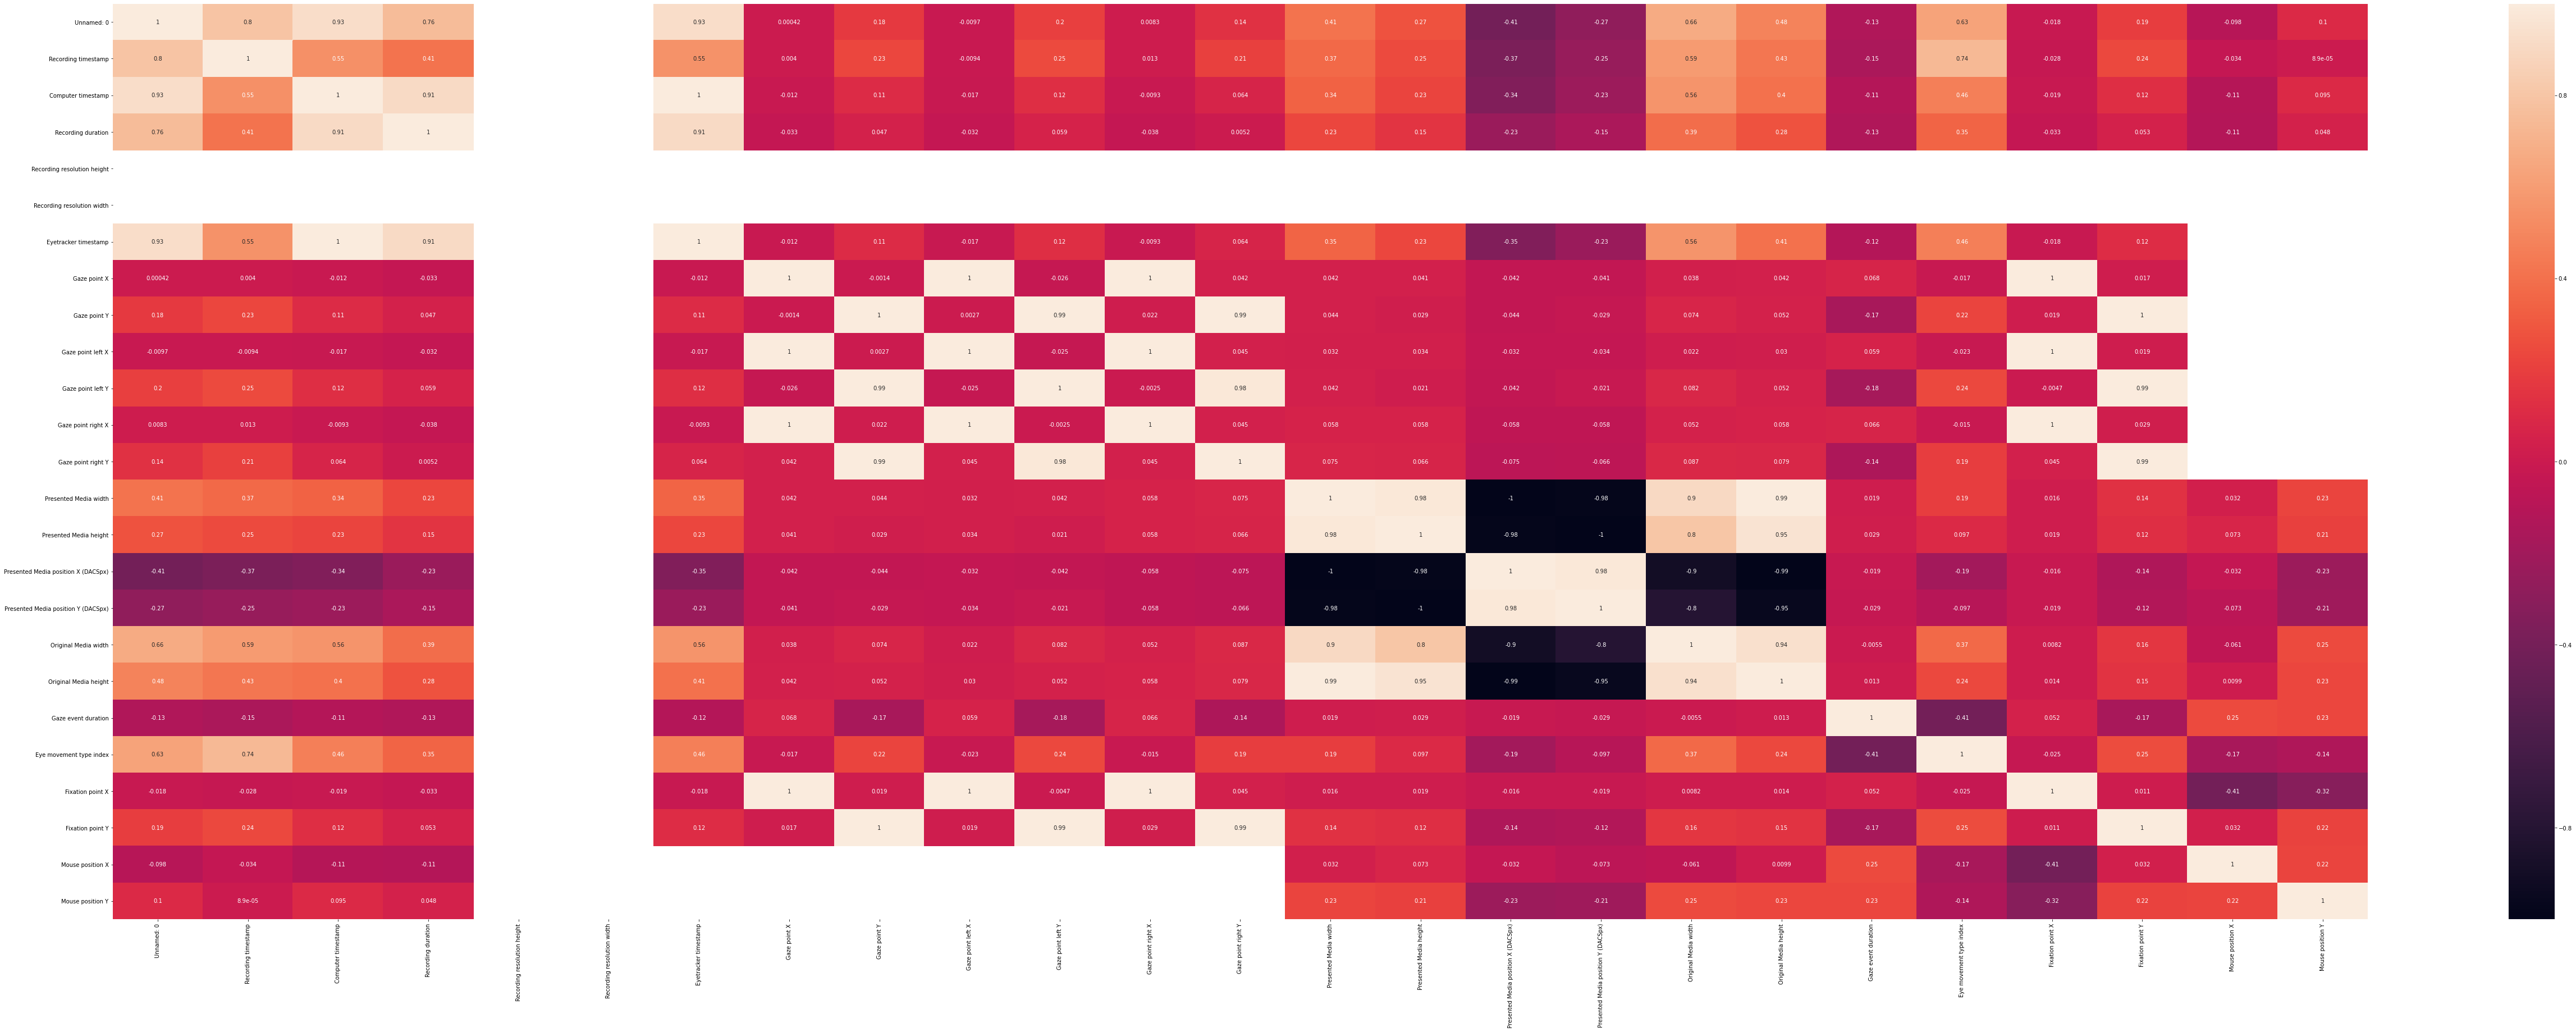

In [28]:
# trend or correlation information simply by using color pairs, and color intensity represent quantity or frequency, especially data that is near -1 or 1, meaning the two are related.
plt.figure(figsize = (90,30))
data_corr = df_sample.corr()
sns.heatmap(data_corr,xticklabels=data_corr.columns,yticklabels=data_corr.columns,annot=True)

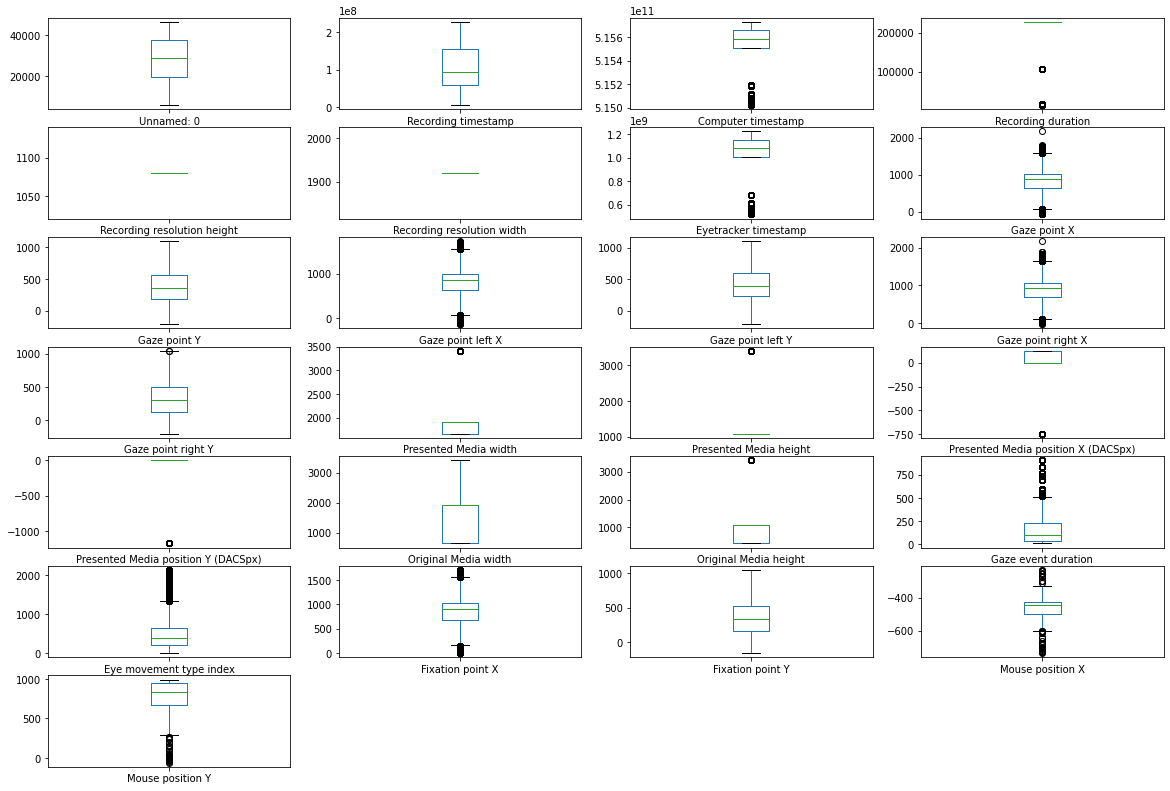

In [31]:

# show box plot to find outlier
df_sample.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

In [52]:
from datetime import datetime

# start time
start_time = "1986-05-03 14:08:35.174000"
end_time = "1986-04-28 14:49:56.917000"

# convert time string to datetime
t1 = datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S.%f")
print('Start time:', t1.time())

t2 = datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S.%f")
print('End time:', t2.time())

# get difference
delta = t2 - t1

# time difference in seconds
print(delta)
print(f"Time difference is {delta.total_seconds()} seconds")

# time difference in milliseconds
ms = delta.total_seconds() * 1000
print(f"Time difference is {ms} milliseconds")

Start time: 14:08:35.174000
End time: 14:49:56.917000
-5 days, 0:41:21.743000
Time difference is -429518.257 seconds
Time difference is -429518257.0 milliseconds


In [23]:
df_Q_A=pd.read_csv("/home/sw22389/assignment/Questionnaire_datasetIA.csv",encoding="cp1252")
df_Q_B=pd.read_csv("/home/sw22389/assignment/Questionnaire_datasetIB.csv",encoding="cp1252")

In [60]:
df_Q_A['Total Score extended']

0     134
1     133
2     116
3     114
4     138
5     121
6     127
7     116
8     114
9     117
10    128
11    124
12    105
13    124
14    122
15    120
16    139
17    138
18    137
19    121
20    117
21    115
22    128
23    143
24    128
25    121
26    113
27    137
28    118
29    129
30    121
31    113
32    100
33    105
34    104
35    136
36    117
37     94
38    139
39    131
40    131
41    123
42    128
43    121
44    113
45    137
46    118
47    129
48    121
49    113
50    100
51    105
52    104
53    136
54    117
55     94
56    139
57    131
58    131
59    123
Name: Total Score extended, dtype: int64

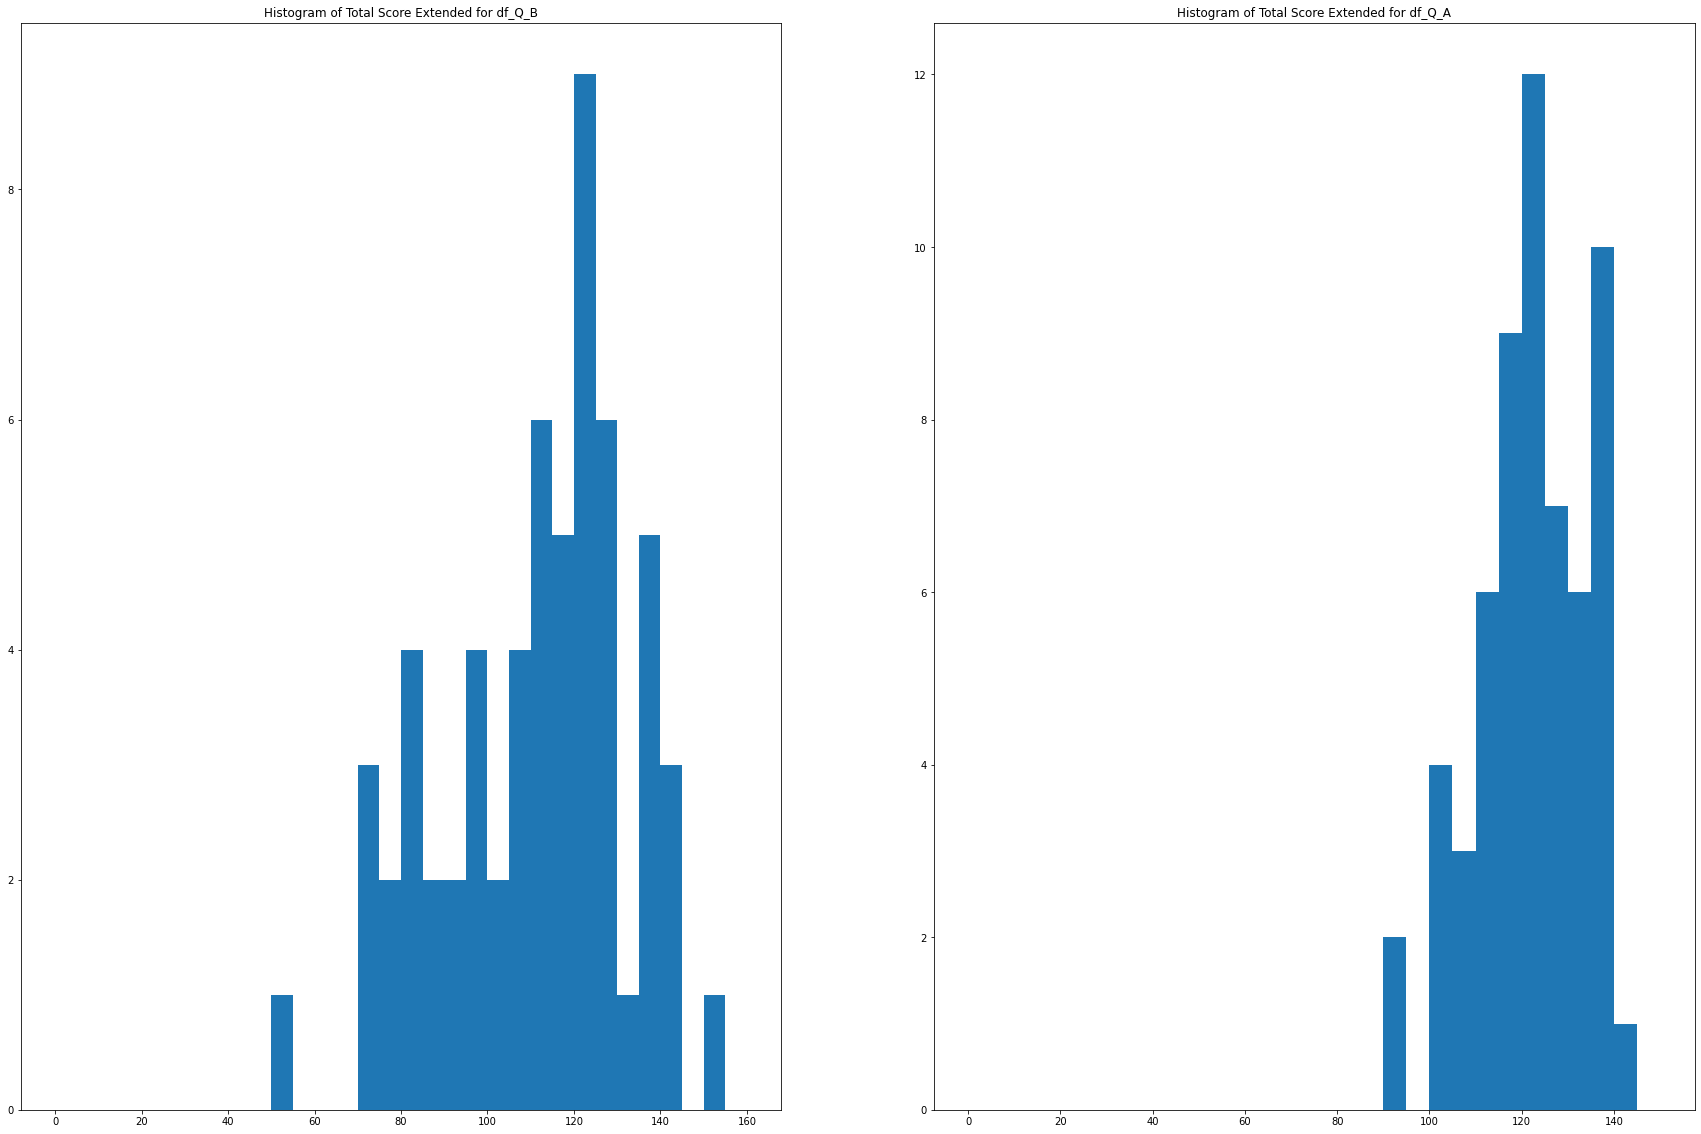

In [31]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(30, 20))

# Define the range for each histogram
range_A = (df_Q_A['Total Score extended'].min(), df_Q_A['Total Score extended'].max() + 5)
range_B = (df_Q_B['Total Score extended'].min(), df_Q_B['Total Score extended'].max() + 5)

bins_A = range(0, int(range_A[1])+5, 5)
bins_B = range(0, int(range_B[1])+5, 5)

axs[0].hist(df_Q_B['Total Score extended'], bins=bins_B, range=range_B)
axs[0].set_title('Histogram of Total Score Extended for df_Q_B')

axs[1].hist(df_Q_A['Total Score extended'], bins=bins_A, range=range_A)
axs[1].set_title('Histogram of Total Score Extended for df_Q_A')



plt.show()


## Pre-processing

In [144]:

files = glob.glob("/home/sw22389/assignment/EyeT/EyeT*.csv")
dfs = []
for file in files:
    df = pd.read_csv(file,low_memory=False)
    dfs.append(df)
concatenated_df = pd.concat(dfs)
df = concatenated_df


In [145]:
df = df.sort_values(by='Computer timestamp', ascending=True)
df

,Computer timestamp,Event,Event value,Export date,Eye movement type,Eye movement type index,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),...,Recording resolution width,Recording software version,Recording start time,Recording start time UTC,Recording timestamp,Sensor,Timeline name,Unnamed: 0,Validity left,Validity right
0,512092386,Eye tracker Calibration end,NaN,29.10.2020,Fixation,64.0,NaN,NaN,NaN,NaN,...,1920,1.145.28180,15:17:34.920,13:17:34.920,23419315,NaN,Timeline1,3082,NaN,NaN
0,512092386,Eye tracker Calibration end,NaN,29.10.2020,Fixation,64.0,NaN,NaN,NaN,NaN,...,1920,1.145.28180,15:17:34.920,13:17:34.920,23419315,NaN,Timeline1,3082,NaN,NaN
1,512092386,ImageStimulusStart,e-tranboard0,20.10.2020,Fixation,64.0,NaN,NaN,NaN,NaN,...,1920,1.145.28180,15:17:34.920,13:17:34.920,23419315,NaN,Timeline1,3083,NaN,NaN
0,512092386,Eye tracker Calibration end,NaN,20.10.2020,Fixation,64.0,NaN,NaN,NaN,NaN,...,1920,1.145.28180,15:17:34.920,13:17:34.920,23419315,NaN,Timeline1,3082,NaN,NaN
1,512092386,ImageStimulusStart,e-tranboard0,29.10.2020,Fixation,64.0,NaN,NaN,NaN,NaN,...,1920,1.145.28180,15:17:34.920,13:17:34.920,23419315,NaN,Timeline1,3083,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,4234413403691,NaN,NaN,26.08.2021,Unclassified,202.0,NaN,NaN,NaN,NaN,...,1920,1.145.28180,13:54:55.083,11:54:55.083,39407741,Mouse,Timeline2,65006,NaN,NaN
4205,4234413405362,NaN,NaN,26.08.2021,Unclassified,202.0,"224,7","65,9","482,2","290,6",...,1920,1.145.28180,13:54:55.083,11:54:55.083,39409412,Eye Tracker,Timeline2,65007,Valid,Valid
4206,4234413413689,NaN,NaN,26.08.2021,Unclassified,202.0,NaN,NaN,NaN,"290,5",...,1920,1.145.28180,13:54:55.083,11:54:55.083,39417739,Eye Tracker,Timeline2,65008,Invalid,Valid
4207,4234413422058,NaN,NaN,26.08.2021,Unclassified,202.0,"224,8","66,0","482,7","290,6",...,1920,1.145.28180,13:54:55.083,11:54:55.083,39426108,Eye Tracker,Timeline2,65009,Valid,Valid


In [147]:
participant_counts = df.groupby('Participant name')['Recording name'].nunique()
participant_counts

Participant name
Participant0001    8
Participant0002    4
Participant0003    8
Participant0004    4
Participant0005    8
Participant0006    4
Participant0007    8
Participant0008    4
Participant0009    8
Participant0010    4
Participant0011    8
Participant0012    4
Participant0013    8
Participant0014    4
Participant0015    8
Participant0016    4
Participant0017    8
Participant0018    4
Participant0019    8
Participant0020    4
Participant0021    8
Participant0022    4
Participant0023    8
Participant0024    4
Participant0025    8
Participant0026    3
Participant0027    8
Participant0028    4
Participant0029    8
Participant0030    4
Participant0031    8
Participant0032    3
Participant0033    8
Participant0034    4
Participant0035    8
Participant0036    4
Participant0037    8
Participant0038    4
Participant0039    8
Participant0040    4
Participant0041    8
Participant0042    4
Participant0043    8
Participant0044    4
Participant0045    8
Participant0046    4
Participant0047  

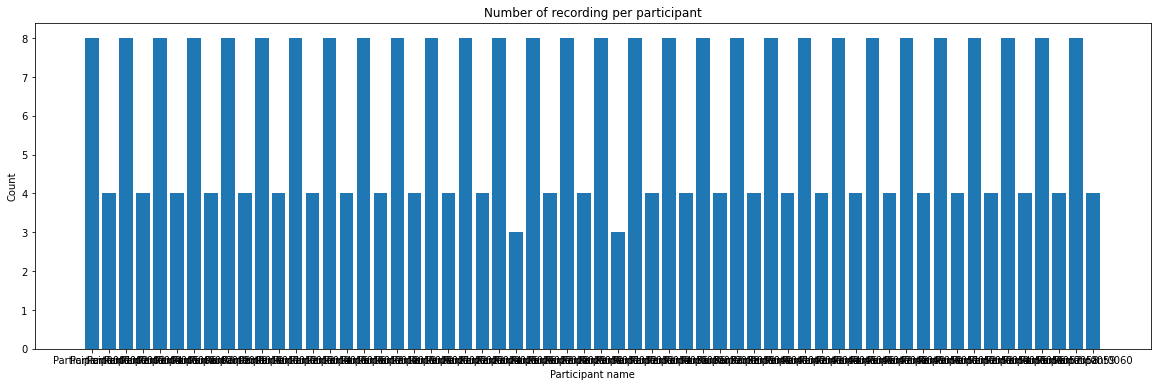

In [148]:
# Plot the data
fig, ax = plt.subplots(figsize=(20,6))
plt.bar(participant_counts.index, participant_counts.values)

# Add axis labels and title
plt.xlabel('Participant name')
plt.ylabel('Count')
plt.title('Number of recording per participant')

# Show the plot
plt.show()

In [149]:
df['Participant name'] = df['Participant name'].str.extract('(\d+)').astype(int)
df['Recording name'] = df['Recording name'].str.extract('(\d+)').astype(int)

In [150]:
df[df['Participant name'] == 11]['Recording name'].unique().tolist()


[42, 43, 44, 45, 46, 47, 48, 49]

In [151]:
i = 1
#j = 'Recording1'
df_time = pd.DataFrame(columns=['Participant name', 'Recording name', 'Total_time'])

while i<=60:
    for j in df[df['Participant name'] == i]['Recording name'].unique().tolist():
        print(j)
        start_time = df[(df['Participant name'] == i) & (df['Recording name'] == j) & (df['Event'] == 'ImageStimulusStart')]['Recording timestamp']
        end_time = df[(df['Participant name'] == i) & (df['Recording name'] == j) & (df['Event'] == 'ImageStimulusEnd')]['Recording timestamp']
        print(start_time)
        print(end_time)
        total_time = end_time - start_time
        new_row = {'Participant name': i,'Recording name': j,'Total_time': total_time}
        df_time = df_time.append(new_row, ignore_index=True)
        break
    break
    i += 1

1
1    23419315
1    23419315
1    23419315
1    23419315
1    23419315
1    23419315
Name: Recording timestamp, dtype: int64
7465    83434461
7465    83434461
7465    83434461
7465    83434461
7465    83434461
7465    83434461
Name: Recording timestamp, dtype: int64


In [152]:
# Change Recording name in order form.
for participant_name in range(1, 61):
    recording_names = df[df['Participant name'] == participant_name]['Recording name'].unique()
    new_recording_names = (recording_names - recording_names.min() + 1).tolist()

    # Update the DataFrame with the new recording names
    df.loc[df['Participant name'] == participant_name, 'Recording name'] = df[df['Participant name'] == participant_name]['Recording name'].replace(recording_names, new_recording_names)


In [34]:
i=1
j="Recording1"
start_time = df[(df['Participant name'] == i) & (df['Recording name'] == j) & (df['Event'] == 'ImageStimulusStart')]['Recording timestamp']
print(start_time)

Series([], Name: Recording timestamp, dtype: int64)


In [49]:
df[(df['Participant name'] == 4) & (df['Recording name'] == 1) & (df['Event'] == 'ImageStimulusStart')]

,Computer timestamp,Event,Event value,Export date,Eye movement type,Eye movement type index,Eye position left X (DACSmm),Eye position left Y (DACSmm),Eye position left Z (DACSmm),Eye position right X (DACSmm),...,Recording resolution width,Recording software version,Recording start time,Recording start time UTC,Recording timestamp,Sensor,Timeline name,Unnamed: 0,Validity left,Validity right
1,435148089322,ImageStimulusStart,babelia 6164137243739591,06.10.2020,Unclassified,92.0,NaN,NaN,NaN,NaN,...,1920,1.145.28180,16:22:30.483,14:22:30.483,19046687,NaN,Timeline1,49122,NaN,NaN
1,435148089322,ImageStimulusStart,babelia 6164137243739591,20.10.2020,Unclassified,92.0,NaN,NaN,NaN,NaN,...,1920,1.145.28180,16:22:30.483,14:22:30.483,19046687,NaN,Timeline1,49122,NaN,NaN
1,435148089322,ImageStimulusStart,babelia 6164137243739591,07.10.2020,Unclassified,92.0,NaN,NaN,NaN,NaN,...,1920,1.145.28180,16:22:30.483,14:22:30.483,19046687,NaN,Timeline1,49122,NaN,NaN


In [97]:
p = df[(df['Event'] == 'ImageStimulusStart') & (df['Participant name'] % 2 == 0)]['Event value'].unique().tolist()
p

['thumbnail_grossTrial',
 'babelia 6164137243739591',
 'Photo1 (1)',
 'Photo2 (1)',
 'Photo3 (1)',
 'Photo1',
 'Photo2',
 'Photo3',
 'thumbnail_grossTrial (1)']

In [98]:
for i in p:
    res = df[df['Presented Stimulus name'] == i][['Presented Media width', 'Presented Media height']].drop_duplicates()
    print(f'{i}: {res}')


thumbnail_grossTrial:    Presented Media width  Presented Media height
2                 1245.0                  1080.0
babelia 6164137243739591:    Presented Media width  Presented Media height
2                 1662.0                  1080.0
Photo1 (1):     Presented Media width  Presented Media height
52                 1920.0                  1080.0
Photo2 (1):      Presented Media width  Presented Media height
104                 1080.0                  1080.0
Photo3 (1):      Presented Media width  Presented Media height
160                 1920.0                  1080.0
Photo1:       Presented Media width  Presented Media height
6884                 1920.0                  1080.0
Photo2:        Presented Media width  Presented Media height
14159                 3415.0                  3415.0
Photo3:        Presented Media width  Presented Media height
19470                 1920.0                  1080.0
thumbnail_grossTrial (1):    Presented Media width  Presented Media height
2

In [61]:
# Create a list of even 'Participant name' values
even_participants = df[df['Participant name'] % 2 == 0]['Participant name'].unique().tolist()

# Create a dictionary to store the counts of each 'Event value' value
value_counts = {}

# Loop over the even 'Participant name' values and count the occurrences of each 'Event value' value
for participant in even_participants:
    values = df[(df['Participant name'] == participant) & (df['Event'] == 'ImageStimulusStart')]['Event value'].tolist()
    print(participant)
    print(values)


20
['thumbnail_grossTrial', 'thumbnail_grossTrial', 'thumbnail_grossTrial', 'thumbnail_grossTrial']
12
['thumbnail_grossTrial', 'thumbnail_grossTrial', 'thumbnail_grossTrial', 'thumbnail_grossTrial']
4
['babelia 6164137243739591', 'babelia 6164137243739591', 'Photo1', 'babelia 6164137243739591', 'Photo1', 'Photo2', 'Photo3', 'babelia 6164137243739591', 'babelia 6164137243739591', 'Photo1', 'babelia 6164137243739591', 'Photo1', 'Photo2', 'Photo3', 'babelia 6164137243739591', 'Photo1', 'Photo2', 'Photo3', 'babelia 6164137243739591', 'babelia 6164137243739591', 'Photo1', 'babelia 6164137243739591', 'Photo1', 'Photo2', 'Photo3', 'babelia 6164137243739591', 'Photo1', 'Photo2', 'Photo3', 'babelia 6164137243739591', 'Photo1', 'Photo2', 'Photo3']
6
['babelia 6164137243739591', 'Photo1 (1)', 'Photo2 (1)', 'Photo3 (1)', 'babelia 6164137243739591', 'Photo1 (1)', 'Photo2 (1)', 'Photo3 (1)', 'babelia 6164137243739591', 'Photo1 (1)', 'Photo2 (1)', 'babelia 6164137243739591', 'Photo1 (1)', 'babelia 6

In [153]:

df[(df['Recording name'] == 4) & (df['Participant name'] == 2)]['Event value'].unique().tolist()


[]

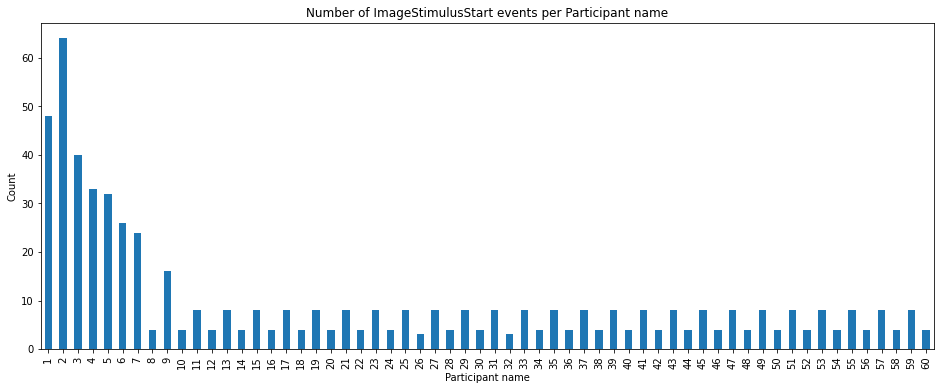

In [154]:
counts = df.groupby('Participant name')['Event'].apply(lambda x: x[x == 'ImageStimulusStart'].count())
counts.plot.bar(figsize=(16, 6))
plt.title('Number of ImageStimulusStart events per Participant name')
plt.xlabel('Participant name')
plt.ylabel('Count')
plt.show()


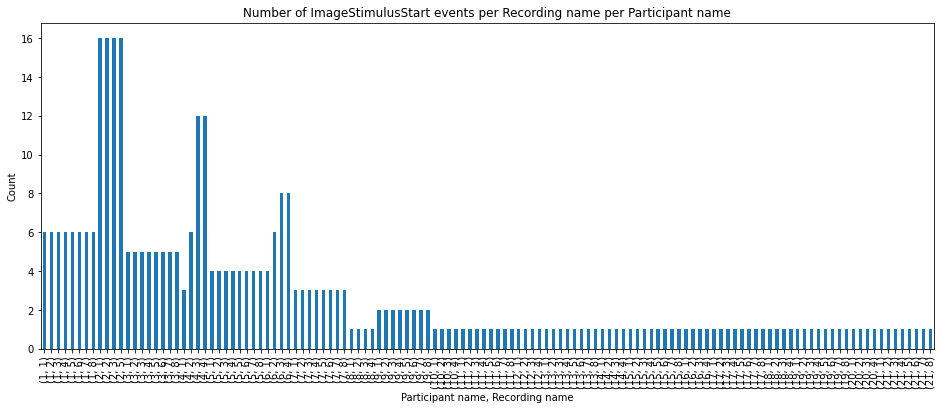

In [155]:
counts = df[df['Participant name'].isin(range(1,22))].groupby(['Participant name', 'Recording name'])['Event'].apply(lambda x: x[x == 'ImageStimulusStart'].count())
counts.plot.bar(figsize=(16, 6))
plt.title('Number of ImageStimulusStart events per Recording name per Participant name')
plt.xlabel('Participant name, Recording name')
plt.ylabel('Count')
plt.show()


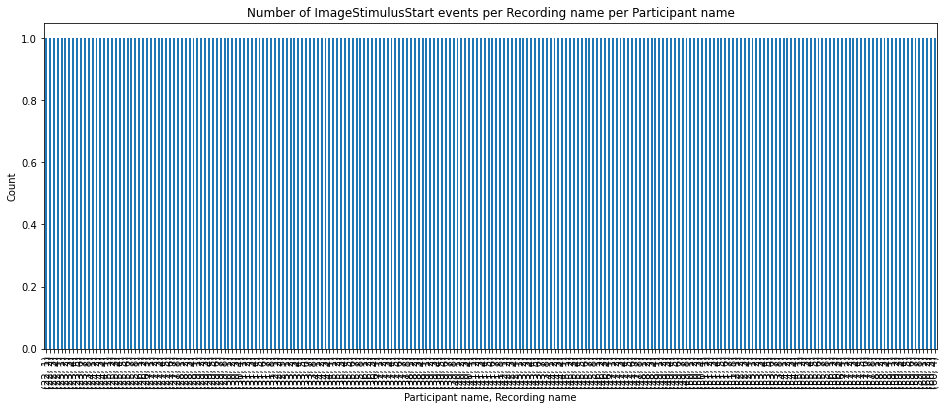

In [156]:
counts = df[df['Participant name'].isin(range(22,61))].groupby(['Participant name', 'Recording name'])['Event'].apply(lambda x: x[x == 'ImageStimulusStart'].count())
counts.plot.bar(figsize=(16, 6))
plt.title('Number of ImageStimulusStart events per Recording name per Participant name')
plt.xlabel('Participant name, Recording name')
plt.ylabel('Count')
plt.show()

## Cut some participates out

For over attempt participants 1,2,3,4,5,6,7,9,
For under attempt participants 26,32

In [157]:
df = df[~df['Participant name'].isin([1,2,3,4,5,6,7,9,26,32])]
df['Participant name'].unique()

array([11, 13, 15, 41, 37, 12, 42, 10, 39, 14, 16, 17,  8, 19, 18, 20, 34,
       36, 21, 22, 43, 38, 40, 52, 23, 54, 24, 56, 25, 27, 28, 30, 29, 47,
       49, 51, 58, 53, 55, 57, 60, 31, 59, 33, 35, 44, 46, 48, 50, 45])

In [158]:
import numpy as np

# Group by Recording name and Participant name
grouped = df.groupby(['Recording name', 'Participant name'])

# Initialize Elapsed time column with NaN
df['Elapsed time'] = np.nan

# Iterate over groups
for (recording, participant), group in grouped:
    
    # Find start and end timestamps
    start_time = group.loc[group['Event'] == 'ImageStimulusStart', 'Recording timestamp'].iloc[0]
    end_time = group.loc[group['Event'] == 'ImageStimulusEnd', 'Recording timestamp'].iloc[0]
    
    # Calculate elapsed time in milliseconds
    elapsed_time = end_time - start_time
    
    # Fill Elapsed time column for this group
    df.loc[(df['Recording name'] == recording) & (df['Participant name'] == participant), 'Elapsed time'] = elapsed_time


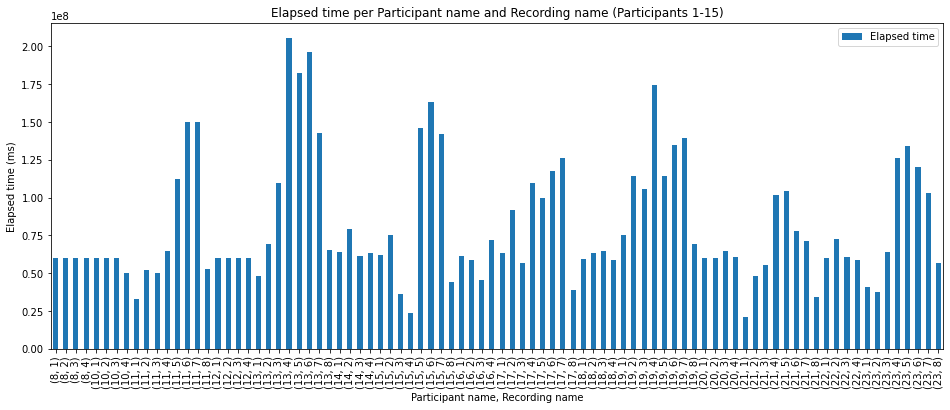

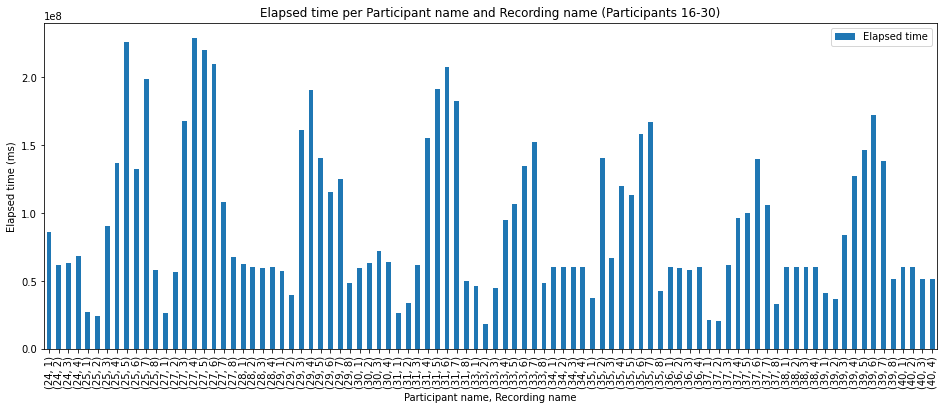

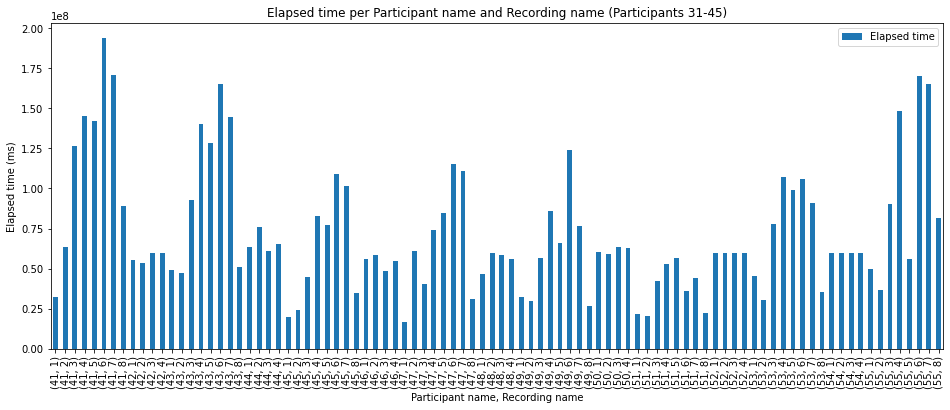

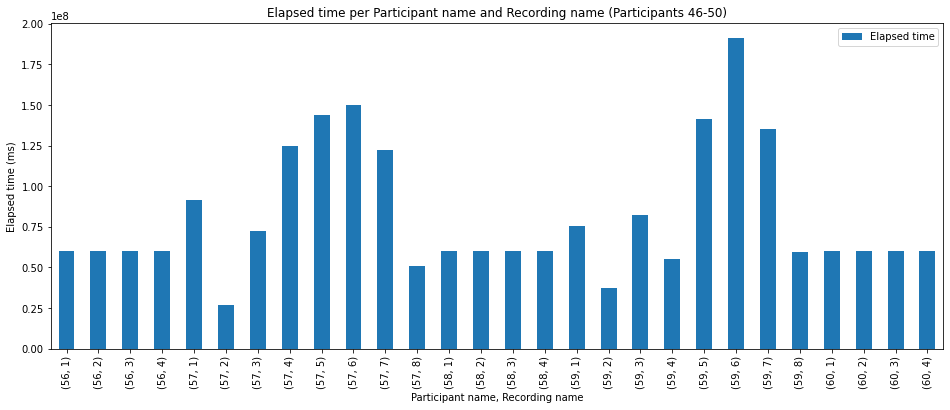

In [159]:
import matplotlib.pyplot as plt

# Group the DataFrame by Participant name and Recording name
grouped_df = df.groupby(['Participant name', 'Recording name'])

# Calculate the elapsed time for each group
elapsed_time = grouped_df.apply(lambda x: np.max(x[x['Event'] == 'ImageStimulusEnd']['Recording timestamp'].astype(int)) 
                                 - np.min(x[x['Event'] == 'ImageStimulusStart']['Recording timestamp'].astype(int)))

# Create a new DataFrame with the grouped data and the elapsed time
plot_df = pd.DataFrame({'Elapsed time': elapsed_time})
plot_df.index.names = ['Participant name', 'Recording name']

# Get a list of unique participant names
participant_names = plot_df.index.get_level_values('Participant name').unique()

# Plot the elapsed time for each combination of Recording name and Participant name for every 20 participants
for i in range(0, len(participant_names), 15):
    fig, ax = plt.subplots(figsize=(16, 6))
    start_index = i
    end_index = min(i + 15, len(participant_names))
    subset = plot_df.loc[plot_df.index.get_level_values('Participant name').isin(participant_names[start_index:end_index])]
    subset.plot.bar(ax=ax)
    plt.title(f'Elapsed time per Participant name and Recording name (Participants {start_index+1}-{end_index})')
    plt.xlabel('Participant name, Recording name')
    plt.ylabel('Elapsed time (ms)')
    plt.show()


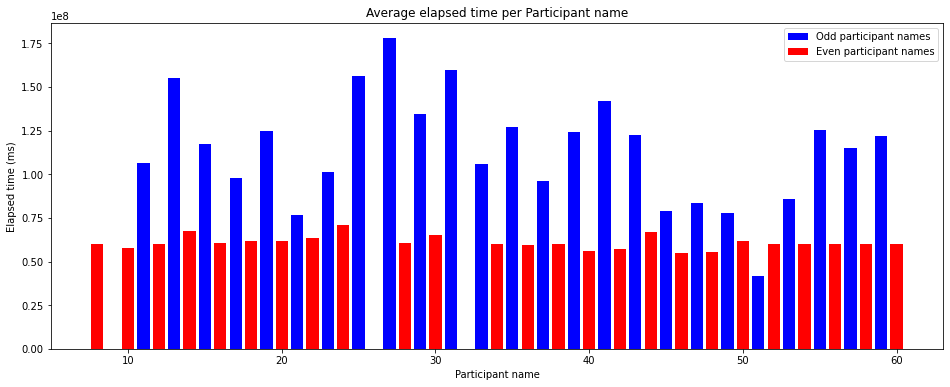

In [160]:
import matplotlib.pyplot as plt

# Group the DataFrame by Participant name
grouped_df = df.groupby('Participant name')

# Calculate the mean elapsed time for each group
mean_elapsed_time = grouped_df['Elapsed time'].mean()

# Separate odd and even Participant names
odd_participant_names = mean_elapsed_time[mean_elapsed_time.index % 2 == 1]
even_participant_names = mean_elapsed_time[mean_elapsed_time.index % 2 == 0]

# Plot the mean elapsed time for each Participant name
fig, ax = plt.subplots(figsize=(16, 6))

# Plot bar chart for odd participant names
ax.bar(odd_participant_names.index, odd_participant_names, color='blue', label='Odd participant names')

# Plot bar chart for even participant names
ax.bar(even_participant_names.index, even_participant_names, color='red', label='Even participant names')


plt.title('Average elapsed time per Participant name')
plt.xlabel('Participant name')
plt.ylabel('Elapsed time (ms)')
plt.legend()
plt.show()


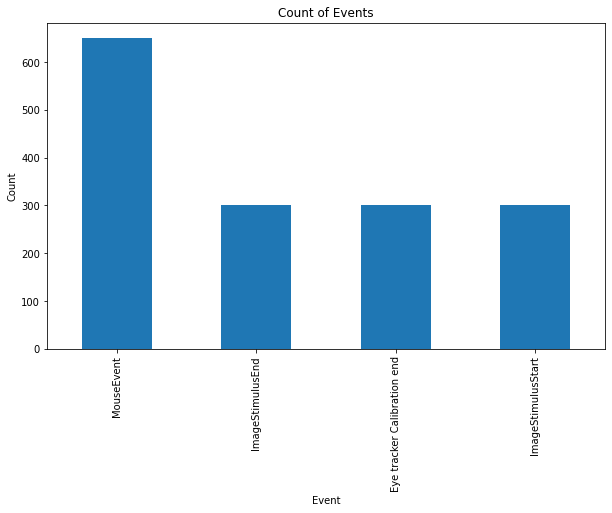

In [161]:
import matplotlib.pyplot as plt

# Get the count of each event
event_counts = df['Event'].value_counts()

# Create a bar plot of the event counts
fig, ax = plt.subplots(figsize=(10, 6))
event_counts.plot(kind='bar', ax=ax)

# Set the title and axis labels
plt.title('Count of Events')
plt.xlabel('Event')
plt.ylabel('Count')

plt.show()


## Remove MouseEvent

In [162]:
df = df[df['Event'] != 'MouseEvent']

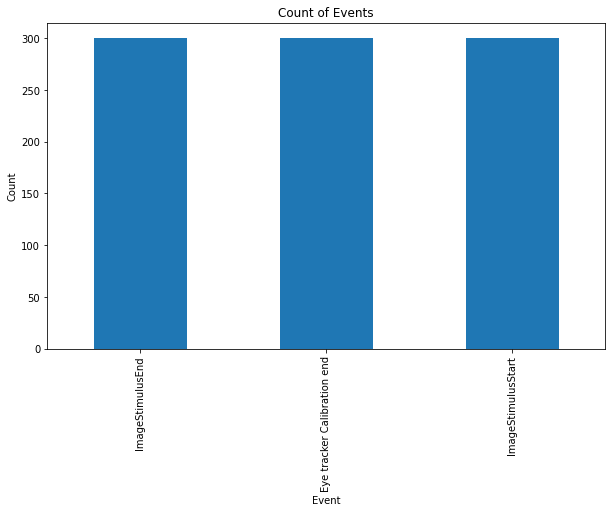

In [163]:
import matplotlib.pyplot as plt

# Get the count of each event
event_counts = df['Event'].value_counts()

# Create a bar plot of the event counts
fig, ax = plt.subplots(figsize=(10, 6))
event_counts.plot(kind='bar', ax=ax)

# Set the title and axis labels
plt.title('Count of Events')
plt.xlabel('Event')
plt.ylabel('Count')

plt.show()

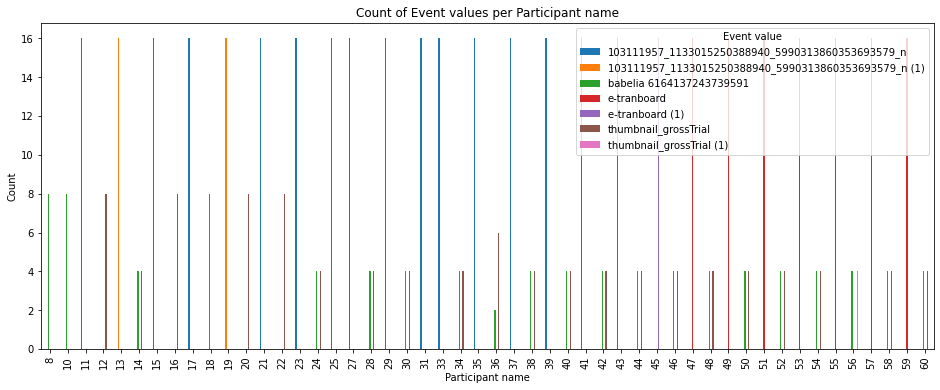

In [85]:
# Group the DataFrame by Participant name and Event value
grouped_df = df.groupby(['Participant name', 'Event value'])

# Count the number of occurrences of each Event value for each Participant name
event_count = grouped_df.size().unstack()

# Plot the counts for each Event value for each Participant name
fig, ax = plt.subplots(figsize=(16, 6))
event_count.plot(kind='bar', ax=ax)
plt.title('Count of Event values per Participant name')
plt.xlabel('Participant name')
plt.ylabel('Count')
plt.show()

Emplathy score before and after with participant

In [221]:

df_Q_A = df_Q_A.rename(columns={'Participant nr': 'Participant name'})
df_Q_B = df_Q_B.rename(columns={'Participant nr': 'Participant name'})
df_Q_A

,Participant name,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the ‘other guy’s’ point of view.,"I am usually objective when I watch a film or play, and I don’t often get completely caught up in it.",I try to look at everybody’s side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other people’s sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9199452,07.09.2020 15:13,07.09.2020 15:13,Yes,Proceed,3,3,4,4,...,1,4,4,4,1,3,4,134,108,5 minutes 5 seconds
1,2,9584002,30.09.2020 11:23,30.09.2020 11:23,Yes,Proceed,3,3,4,4,...,2,4,3,3,4,2,2,133,105,5 minutes 55 seconds
2,3,9112363,02.09.2020 09:17,02.09.2020 09:17,Yes,Proceed,2,2,3,4,...,3,3,3,3,3,3,3,116,81,6 minutes 49 seconds
3,4,9727754,06.10.2020 13:20,06.10.2020 13:20,Yes,Proceed,2,3,4,3,...,2,3,4,4,2,4,2,114,96,8 minutes 39 seconds
4,5,9730232,06.10.2020 14:53,06.10.2020 14:53,Yes,Proceed,3,3,4,4,...,1,4,2,1,4,4,4,138,106,7 minutes 27 seconds
5,6,9583726,30.09.2020 11:06,30.09.2020 11:06,Yes,Proceed,1,2,4,3,...,1,3,4,3,2,3,3,121,92,9 minutes 39 seconds
6,7,9957250,20.10.2020 14:14,20.10.2020 14:14,Yes,Proceed,2,2,4,4,...,2,3,3,2,4,3,2,127,81,5 minutes 49 seconds
7,8,9151582,04.09.2020 13:46,04.09.2020 13:46,Yes,Proceed,2,2,3,3,...,2,3,4,3,3,2,3,116,86,9 minutes 35 seconds
8,9,10176176,29.10.2020 13:27,29.10.2020 13:27,Yes,Proceed,4,3,2,3,...,4,4,4,1,2,2,2,114,87,7 minutes 45 seconds
9,10,9150442,04.09.2020 12:54,04.09.2020 12:54,Yes,Proceed,1,3,3,3,...,2,2,3,2,2,3,1,117,82,4 minutes 45 seconds


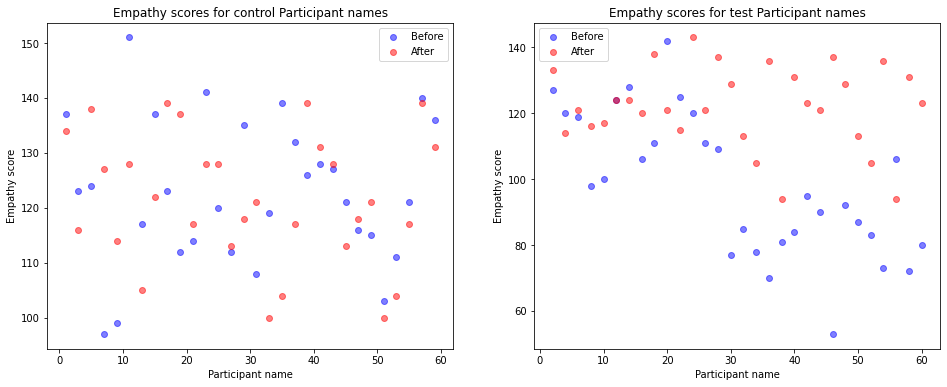

In [236]:
import matplotlib.pyplot as plt

# Separate odd and even Participant names
odd_participant_names = df_Q_A[df_Q_A['Participant name'] % 2 == 1]['Participant name']
even_participant_names = df_Q_A[df_Q_A['Participant name'] % 2 == 0]['Participant name']

# Create scatter plot for odd Participant names
odd_Q_A = df_Q_A[df_Q_A['Participant name'].isin(odd_participant_names)]
odd_Q_B = df_Q_B[df_Q_B['Participant name'].isin(odd_participant_names)]

# Create scatter plot for even Participant names
even_Q_A = df_Q_A[df_Q_A['Participant name'].isin(even_participant_names)]
even_Q_B = df_Q_B[df_Q_B['Participant name'].isin(even_participant_names)]

# Create figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot first subplot
axes[0].scatter(odd_Q_B['Participant name'], odd_Q_B['Total Score extended'], c='blue', alpha=0.5, label='Before')
axes[0].scatter(odd_Q_A['Participant name'], odd_Q_A['Total Score extended'], c='red', alpha=0.5, label='After')
axes[0].set_xlabel('Participant name')
axes[0].set_ylabel('Empathy score')
axes[0].set_title('Empathy scores for control Participant names')
axes[0].legend()

# Plot second subplot
axes[1].scatter(even_Q_B['Participant name'], even_Q_B['Total Score extended'], c='blue', alpha=0.5, label='Before')
axes[1].scatter(even_Q_A['Participant name'], even_Q_A['Total Score extended'], c='red', alpha=0.5, label='After')
axes[1].set_xlabel('Participant name')
axes[1].set_ylabel('Empathy score')
axes[1].set_title('Empathy scores for test Participant names')
axes[1].legend()

# Show the plot
plt.show()


## Changed null-values and EyesNotFound to the event type Unclassified.

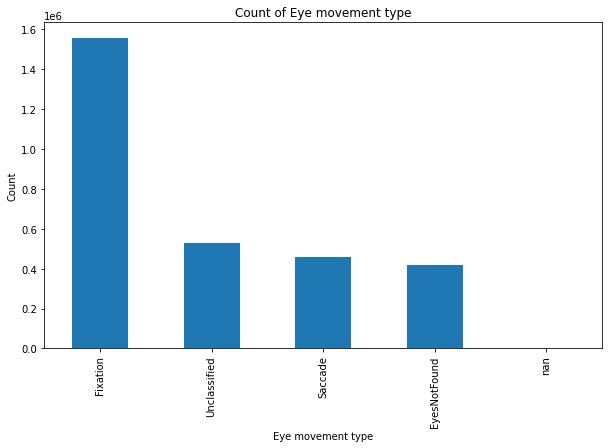

In [164]:
import matplotlib.pyplot as plt

# Get the count of each event
event_counts = df['Eye movement type'].value_counts(dropna=False)

# Create a bar plot of the event counts
fig, ax = plt.subplots(figsize=(10, 6))
event_counts.plot(kind='bar', ax=ax)

# Set the title and axis labels
plt.title('Count of Eye movement type')
plt.xlabel('Eye movement type')
plt.ylabel('Count')

plt.show()

In [165]:
df['Eye movement type'] = df['Eye movement type'].fillna('Unclassified')
df['Eye movement type'] = df['Eye movement type'].replace('EyesNotFound', 'Unclassified')

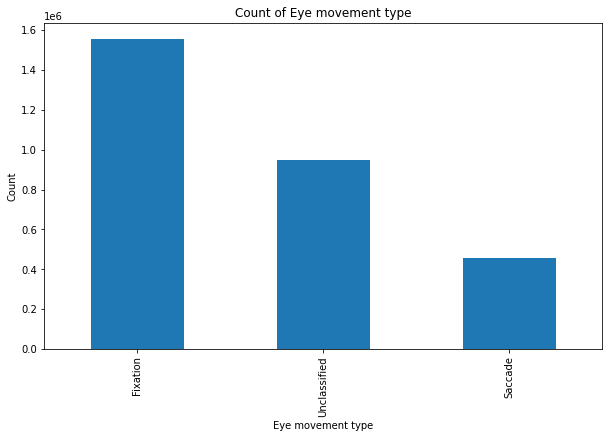

In [166]:
import matplotlib.pyplot as plt

# Get the count of each event
event_counts = df['Eye movement type'].value_counts(dropna=False)

# Create a bar plot of the event counts
fig, ax = plt.subplots(figsize=(10, 6))
event_counts.plot(kind='bar', ax=ax)

# Set the title and axis labels
plt.title('Count of Eye movement type')
plt.xlabel('Eye movement type')
plt.ylabel('Count')

plt.show()

In [182]:
df['Pupil diameter left'] = df['Pupil diameter left'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)
df['Pupil diameter right'] = df['Pupil diameter right'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)
df['Pupil diameter left'] = df['Pupil diameter left'].astype(float)
df['Pupil diameter right'] = df['Pupil diameter right'].astype(float)

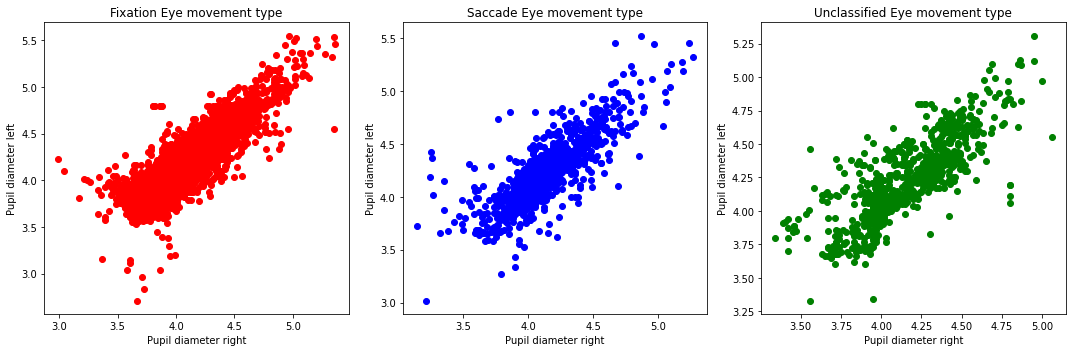

In [104]:
import matplotlib.pyplot as plt
colors = {'Fixation': 'red', 'Saccade': 'blue', 'Unclassified': 'green'}
# Filter the data for Participant name 8 and Eye movement types Fixation, Saccade and Unclassified
filter_condition = ((df['Participant name'] == 8) & (df['Eye movement type'].isin(['Fixation', 'Saccade', 'Unclassified'])))
filtered_data = df[filter_condition]

# Create separate plots for each Eye movement type
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i, eye_type in enumerate(['Fixation', 'Saccade', 'Unclassified']):
    plot_data = filtered_data[filtered_data['Eye movement type'] == eye_type]
    axes[i].scatter(plot_data['Pupil diameter right'], plot_data['Pupil diameter left'],color=colors[eye_type])
    axes[i].set_xlabel('Pupil diameter right')
    axes[i].set_ylabel('Pupil diameter left')
    axes[i].set_title(f'{eye_type} Eye movement type')

plt.tight_layout()
plt.show()


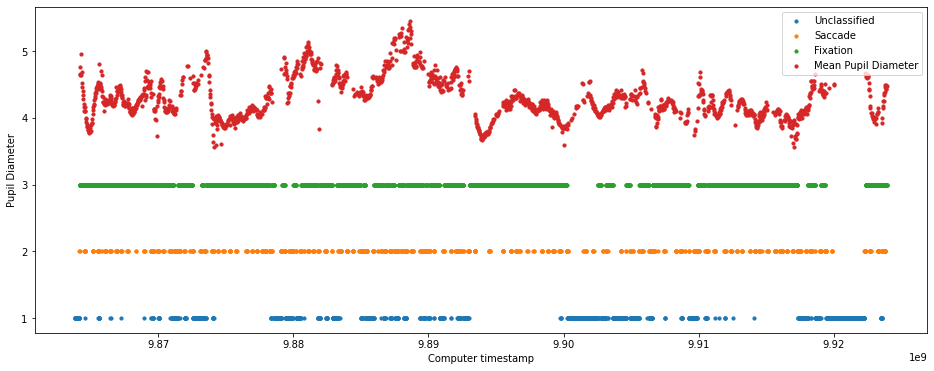

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the data for Participant name 8, Recording name 1, and Eye movement types Fixation, Saccade, and Unclassified
filter_condition = ((df['Participant name'] == 8) & (df['Recording name'] == 1) & (df['Eye movement type'].isin(['Fixation', 'Saccade', 'Unclassified'])))
filtered_data = df[filter_condition]

# Map Eye movement type to values 1, 2, 3 for plotting
filtered_data['movement_val'] = filtered_data['Eye movement type'].map({'Unclassified': 1, 'Saccade': 2, 'Fixation': 3})

# Calculate mean pupil diameter from Pupil diameter left and right
filtered_data['mean_pupil'] = (filtered_data['Pupil diameter left'] + filtered_data['Pupil diameter right']) / 2

# Plot the data
fig, ax = plt.subplots(figsize=(16, 6))
for movement_type, group in filtered_data.groupby('movement_val'):
    #ax.scatter(group['Computer timestamp'], np.ones(len(group)) * movement_type, s=10, label=movement_type)
    ax.scatter(group['Computer timestamp'], np.ones(len(group)) * movement_type, s=10, label=filtered_data['Eye movement type'].unique()[movement_type-1])
ax.scatter(filtered_data['Computer timestamp'], filtered_data['mean_pupil'], s=10, label='Mean Pupil Diameter')
ax.set_xlabel('Computer timestamp')
ax.set_ylabel('Pupil Diameter')
ax.legend()
plt.show()


## Create new dataframe to train model

In [171]:
# select unique values from 'Participant name' column
unique_names = df['Participant name'].unique()

# create new dataframe with unique names
new_df = pd.DataFrame({'Participant name': unique_names})
new_df = new_df.sort_values('Participant name').reset_index(drop=True)

# print new dataframe
new_df

,Participant name
0,8
1,10
2,11
3,12
4,13
5,14
6,15
7,16
8,17
9,18


In [174]:
# group by 'Participant name' and select unique 'Recording name' values for each group
unique_recordings = df.groupby('Participant name')['Recording name'].apply(lambda x: x.unique()).reset_index()

# explode the unique recordings to create multiple rows for each 'Participant name'
new_df = unique_recordings.explode('Recording name')

# sort the new dataframe by 'Participant name'
new_df = new_df.sort_values('Participant name').reset_index(drop=True)

# print new dataframe
print(new_df)

     Participant name Recording name
0                   8              1
1                   8              2
2                   8              3
3                   8              4
4                  10              1
..                ...            ...
295                59              4
296                60              3
297                60              1
298                60              2
299                60              4

[300 rows x 2 columns]


In [190]:
df['Pupil diameter mean'] = (df['Pupil diameter left'] + df['Pupil diameter right']) / 2

TypeError: 'numpy.ndarray' object is not callable

In [192]:

# group the dataframe by 'Participant name' and 'Recording name' and calculate the required statistics for 'Pupil diameter mean'
grouped_df = df.groupby(['Participant name', 'Recording name'])['Pupil diameter mean'].agg([np.mean, np.max, np.min, np.std])

# rename the columns to match the desired output
grouped_df = grouped_df.rename(columns={
    'mean': 'Pupil diameter mean',
    'amax': 'Pupil diameter max',
    'amin': 'Pupil diameter min',
    'std': 'Pupil diameter std'
})

# reset the index to make 'Participant name' and 'Recording name' regular columns
grouped_df = grouped_df.reset_index()

# display the new dataframe
print(grouped_df)
grouped_df


     Participant name  Recording name  Pupil diameter mean  \
0                   8               1             4.285498   
1                   8               2             4.159457   
2                   8               3             4.080679   
3                   8               4             4.010152   
4                  10               1             3.253155   
..                ...             ...                  ...   
295                59               8             2.956741   
296                60               1             3.210304   
297                60               2             3.211766   
298                60               3             3.158862   
299                60               4             3.320406   

     Pupil diameter max  Pupil diameter min  Pupil diameter std  
0                 5.445               3.570            0.310255  
1                 5.030               3.280            0.209858  
2                 5.130               3.115            0.

,Participant name,Recording name,Pupil diameter mean,Pupil diameter max,Pupil diameter min,Pupil diameter std
0,8,1,4.285498,5.445,3.570,0.310255
1,8,2,4.159457,5.030,3.280,0.209858
2,8,3,4.080679,5.130,3.115,0.313496
3,8,4,4.010152,4.970,3.265,0.197150
4,10,1,3.253155,4.640,2.620,0.237729
...,...,...,...,...,...,...
295,59,8,2.956741,3.825,2.435,0.159706
296,60,1,3.210304,3.660,2.665,0.123036
297,60,2,3.211766,3.640,2.850,0.108543
298,60,3,3.158862,3.765,2.505,0.133811


In [196]:
# group the grouped dataframe by 'Participant name' and calculate the mean and std of 'Pupil diameter mean' column for each group
participant_mean_std_df = grouped_df.groupby('Participant name')['Pupil diameter mean'].agg([np.mean, np.std])

# rename the columns to match the desired output
participant_mean_std_df = participant_mean_std_df.rename(columns={
    'mean': 'Pupil diameter mean total',
    'std': 'Pupil diameter std total'
})

# display the new dataframe
participant_mean_std_df

,Pupil diameter mean total,Pupil diameter std total
Participant name,,
8,4.133947,0.118013
10,3.282211,0.062083
11,3.329667,0.137071
12,3.457580,0.758935
13,2.826562,0.073036
14,3.173437,0.198295
15,2.973954,0.175902
16,3.289216,0.042314
17,2.580962,0.142804


In [198]:
merged_df = pd.merge(grouped_df, participant_mean_std_df, on='Participant name')
merged_df

,Participant name,Recording name,Pupil diameter mean,Pupil diameter max,Pupil diameter min,Pupil diameter std,Pupil diameter mean total,Pupil diameter std total
0,8,1,4.285498,5.445,3.570,0.310255,4.133947,0.118013
1,8,2,4.159457,5.030,3.280,0.209858,4.133947,0.118013
2,8,3,4.080679,5.130,3.115,0.313496,4.133947,0.118013
3,8,4,4.010152,4.970,3.265,0.197150,4.133947,0.118013
4,10,1,3.253155,4.640,2.620,0.237729,3.282211,0.062083
...,...,...,...,...,...,...,...,...
295,59,8,2.956741,3.825,2.435,0.159706,2.954143,0.082884
296,60,1,3.210304,3.660,2.665,0.123036,3.225335,0.067988
297,60,2,3.211766,3.640,2.850,0.108543,3.225335,0.067988
298,60,3,3.158862,3.765,2.505,0.133811,3.225335,0.067988


In [211]:
# group the dataframe by 'Recording name' and calculate the fraction of 'Fixation' and 'Saccade' for each group
count_df = df.groupby(['Participant name', 'Recording name'])['Eye movement type'].value_counts(normalize=True)
#count_df
fractions_df = count_df.unstack()
fractions_df

Eye movement type                Fixation   Saccade  Unclassified
Participant name Recording name                                  
8                1               0.624585  0.135797      0.239618
                 2               0.772194  0.113765      0.114041
                 3               0.697556  0.138379      0.164066
                 4               0.569275  0.117118      0.313606
10               1               0.746608  0.161174      0.092218
...                                   ...       ...           ...
59               8               0.374499  0.160144      0.465357
60               1               0.624483  0.128757      0.246760
                 2               0.732936  0.138031      0.129032
                 3               0.705426  0.120709      0.173865
                 4               0.698769  0.130506      0.170725

[300 rows x 3 columns]

In [217]:
fractions_merge_df = pd.merge(merged_df, fractions_df[['Fixation', 'Saccade']], on=['Participant name', 'Recording name'])
fractions_merge_df = fractions_merge_df.rename(columns={'Fixation': 'Fixation fraction', 'Saccade': 'Saccade fraction'})
fractions_merge_df

,Participant name,Recording name,Pupil diameter mean,Pupil diameter max,Pupil diameter min,Pupil diameter std,Pupil diameter mean total,Pupil diameter std total,Fixation fraction,Saccade fraction
0,8,1,4.285498,5.445,3.570,0.310255,4.133947,0.118013,0.624585,0.135797
1,8,2,4.159457,5.030,3.280,0.209858,4.133947,0.118013,0.772194,0.113765
2,8,3,4.080679,5.130,3.115,0.313496,4.133947,0.118013,0.697556,0.138379
3,8,4,4.010152,4.970,3.265,0.197150,4.133947,0.118013,0.569275,0.117118
4,10,1,3.253155,4.640,2.620,0.237729,3.282211,0.062083,0.746608,0.161174
...,...,...,...,...,...,...,...,...,...,...
295,59,8,2.956741,3.825,2.435,0.159706,2.954143,0.082884,0.374499,0.160144
296,60,1,3.210304,3.660,2.665,0.123036,3.225335,0.067988,0.624483,0.128757
297,60,2,3.211766,3.640,2.850,0.108543,3.225335,0.067988,0.732936,0.138031
298,60,3,3.158862,3.765,2.505,0.133811,3.225335,0.067988,0.705426,0.120709


In [233]:
# get the unique values of 'Participant name' in fractions_merge_df
unique_participants = fractions_merge_df['Participant name'].unique()

# merge the dataframes using inner join and the subset of unique 'Participant name'
Q_A_merge_df = pd.merge(df_Q_A[df_Q_A['Participant name'].isin(unique_participants)][['Participant name', 'Total Score extended']], 
                        fractions_merge_df, on=['Participant name'])
Q_A_merge_df = Q_A_merge_df.rename(columns={'Total Score extended': 'Total Score extended after'})
                                            
                                            
final_df = pd.merge(df_Q_B[df_Q_B['Participant name'].isin(unique_participants)][['Participant name', 'Total Score extended']], 
                        Q_A_merge_df, on=['Participant name'])
final_df = final_df.rename(columns={'Total Score extended': 'Total Score extended before'})

final_df['Score diff'] = final_df['Total Score extended after'] - final_df['Total Score extended before']


final_df['Group'] = final_df['Participant name'].apply(lambda x: 0 if x % 2 == 0 else 1)

final_df



,Participant name,Total Score extended before,Total Score extended after,Recording name,Pupil diameter mean,Pupil diameter max,Pupil diameter min,Pupil diameter std,Pupil diameter mean total,Pupil diameter std total,Fixation fraction,Saccade fraction,Score diff,Group
0,8,98,116,1,4.285498,5.445,3.570,0.310255,4.133947,0.118013,0.624585,0.135797,18,0
1,8,98,116,2,4.159457,5.030,3.280,0.209858,4.133947,0.118013,0.772194,0.113765,18,0
2,8,98,116,3,4.080679,5.130,3.115,0.313496,4.133947,0.118013,0.697556,0.138379,18,0
3,8,98,116,4,4.010152,4.970,3.265,0.197150,4.133947,0.118013,0.569275,0.117118,18,0
4,10,100,117,1,3.253155,4.640,2.620,0.237729,3.282211,0.062083,0.746608,0.161174,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,59,136,131,8,2.956741,3.825,2.435,0.159706,2.954143,0.082884,0.374499,0.160144,-5,1
296,60,80,123,1,3.210304,3.660,2.665,0.123036,3.225335,0.067988,0.624483,0.128757,43,0
297,60,80,123,2,3.211766,3.640,2.850,0.108543,3.225335,0.067988,0.732936,0.138031,43,0
298,60,80,123,3,3.158862,3.765,2.505,0.133811,3.225335,0.067988,0.705426,0.120709,43,0


In [234]:
final_df.to_csv('final_df.csv', index=False)